In [38]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def groverSearch(target):
    n_qubits = len(target)
    qc = QuantumCircuit(n_qubits, n_qubits)
    for i in range(n_qubits):
        qc.h(i)
    iteration = int(np.pi/4 * np.sqrt(2**n_qubits))
    for _ in range(iteration):
        target_int = int(target, 2)
        binary = bin(target_int)[2:].zfill(n_qubits)
        for i, bit in enumerate(binary):
            if bit == '0':
                qc.x(i)
        if n_qubits > 1:
            qc.h(n_qubits-1)
            qc.mcx(list(range(n_qubits-1)), n_qubits-1)
            qc.h(n_qubits-1)
        else:
            qc.z(0)
        for i, bit in enumerate(binary):
            if bit == '0':
                qc.x(i)
        for i in range(n_qubits):
            qc.h(i)
            qc.x(i)
        if n_qubits > 1:
            qc.h(n_qubits-1)
            qc.mcx(list(range(n_qubits-1)), n_qubits-1)
            qc.h(n_qubits-1)
        else:
            qc.z(0)
        for i in range(n_qubits):
            qc.x(i)
            qc.h(i)

    qc.measure(range(n_qubits), range(n_qubits))
    backend = AerSimulator()
    job = backend.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts()
    max_state = max(counts, key=counts.get)
    return max_state

In [40]:
target = input("Enter target binary string for Grover's (e.g., '11'): ")
groverResult = groverSearch(target)
print(f"Grover's algorithm found the target state: {groverResult}")

Grover's algorithm found the target state: 100


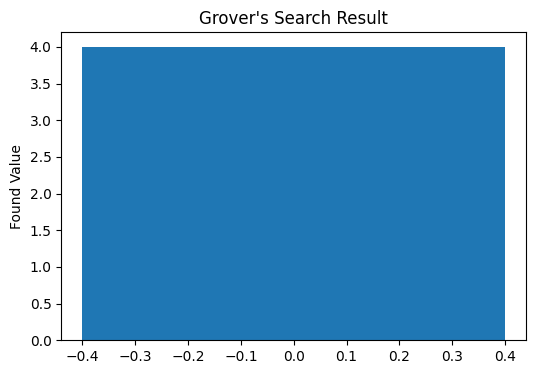

In [41]:
# Plot result
plt.figure(figsize=(6, 4))
plt.bar([0], [int(groverResult, 2)])
plt.title("Grover's Search Result")
plt.ylabel('Found Value')
plt.show()